# LA Traffic Accidents EDA

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

## Preprocessing

In [2]:
df = pd.read_csv("data/traffic-collision-data-from-2010-to-present.csv")
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,191216137,2019-06-15T00:00:00.000,2019-06-15T00:00:00.000,330,12,77th Street,1203,997,TRAFFIC COLLISION,4025 3028 3101 3006 3030,...,STREET,52ND ST,WESTERN AV,"{'longitude': '-118.3089', 'latitude': '33.995...",24027.0,742.0,1049.0,7.0,14.0,35.0
1,191011095,2019-06-15T00:00:00.000,2019-06-15T00:00:00.000,1425,10,West Valley,1017,997,TRAFFIC COLLISION,NaN,...,PARKING LOT,17200 SATICOY ST,NaN,"{'longitude': '-118.5077', 'latitude': '34.208...",19734.0,259.0,315.0,NaN,3.0,61.0
2,190411077,2019-06-15T00:00:00.000,2019-06-15T00:00:00.000,1200,4,Hollenbeck,469,997,TRAFFIC COLLISION,4024 3036 3004 3026 3034 3029 3101,...,STREET,4TH ST,INDIANA ST,"{'longitude': '-118.1924', 'latitude': '34.032...",24028.0,516.0,956.0,NaN,9.0,38.0
3,190511313,2019-06-15T00:00:00.000,2019-06-15T00:00:00.000,850,5,Harbor,504,997,TRAFFIC COLLISION,NaN,...,STREET,1600 W 207TH ST,NaN,"{'longitude': '-118.3066', 'latitude': '33.842...",25715.0,944.0,825.0,NaN,15.0,55.0
4,191814225,2019-06-15T00:00:00.000,2019-06-15T00:00:00.000,435,18,Southeast,1846,997,TRAFFIC COLLISION,4025 3028 3101 3006 3030,...,STREET,EVERS AV,111TH ST,"{'longitude': '-118.2473', 'latitude': '33.934...",24354.0,821.0,1186.0,7.0,15.0,40.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476337 entries, 0 to 476336
Data columns (total 24 columns):
DR Number                            476337 non-null int64
Date Reported                        476337 non-null object
Date Occurred                        476337 non-null object
Time Occurred                        476337 non-null int64
Area ID                              476337 non-null int64
Area Name                            476337 non-null object
Reporting District                   476337 non-null int64
Crime Code                           476337 non-null int64
Crime Code Description               476337 non-null object
MO Codes                             391462 non-null object
Victim Age                           398919 non-null float64
Victim Sex                           469409 non-null object
Victim Descent                       468704 non-null object
Premise Code                         476312 non-null float64
Premise Description                  476312 non-null

In [6]:
# Find Null Values
pd.isnull(df).sum()

DR Number                                 0
Date Reported                             0
Date Occurred                             0
Time Occurred                             0
Area ID                                   0
Area Name                                 0
Reporting District                        0
Crime Code                                0
Crime Code Description                    0
MO Codes                              84875
Victim Age                            77418
Victim Sex                             6928
Victim Descent                         7633
Premise Code                             25
Premise Description                      25
Address                                   0
Cross Street                          21138
Location                                  0
Zip Codes                               395
Census Tracts                          6461
Precinct Boundaries                    3064
LA Specific Plans                    301102
Council Districts               

In [7]:
df.drop(["DR Number", # For search purpose not useful here
         "Area ID", # We have Area Name
         "Crime Code", # Uniform
         "Crime Code Description", # Uniform
         "Premise Code",  # Could use Premise Description
         "Date Reported", # More intrested in date occured
         "Neighborhood Councils (Certified)", # Meaningless without description
         "Census Tracts", # Meaningless without description
         "Council Districts", # Irrelevant
         "MO Codes", # Too much null values
         "LA Specific Plans"], # Too much null values
         axis=1, inplace=True)

In [8]:
pd.isnull(df).sum()

Date Occurred              0
Time Occurred              0
Area Name                  0
Reporting District         0
Victim Age             77418
Victim Sex              6928
Victim Descent          7633
Premise Description       25
Address                    0
Cross Street           21138
Location                   0
Zip Codes                395
Precinct Boundaries     3064
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,Date Occurred,Time Occurred,Area Name,Reporting District,Victim Age,Victim Sex,Victim Descent,Premise Description,Address,Cross Street,Location,Zip Codes,Precinct Boundaries
0,2019-06-15T00:00:00.000,330,77th Street,1203,39.0,F,B,STREET,52ND ST,WESTERN AV,"{'longitude': '-118.3089', 'latitude': '33.995...",24027.0,1049.0
2,2019-06-15T00:00:00.000,1200,Hollenbeck,469,69.0,M,H,STREET,4TH ST,INDIANA ST,"{'longitude': '-118.1924', 'latitude': '34.032...",24028.0,956.0
4,2019-06-15T00:00:00.000,435,Southeast,1846,60.0,M,H,STREET,EVERS AV,111TH ST,"{'longitude': '-118.2473', 'latitude': '33.934...",24354.0,1186.0
7,2019-06-15T00:00:00.000,650,West Valley,1039,25.0,M,H,STREET,VANOWEN ST,HASKELL AV,"{'longitude': '-118.4749', 'latitude': '34.193...",19734.0,296.0
8,2019-06-15T00:00:00.000,400,Rampart,237,25.0,F,H,STREET,CORTEZ ST,DAWSON ST,"{'longitude': '-118.2632', 'latitude': '34.067...",23444.0,930.0


In [12]:
df.columns = ['date', 'hour', 'area', 'district', 'victim_age', 'victim_sex', 'victim_race', 'premise', 'address', 'cross_street', 'location', 'zip_code', 'precinct_boundary']

In [13]:
df.head()

,date,hour,area,district,victim_age,victim_sex,victim_race,premise,address,cross_street,location,zip_code,precinct_boundary
0,2019-06-15T00:00:00.000,330,77th Street,1203,39.0,F,B,STREET,52ND ST,WESTERN AV,"{'longitude': '-118.3089', 'latitude': '33.995...",24027.0,1049.0
2,2019-06-15T00:00:00.000,1200,Hollenbeck,469,69.0,M,H,STREET,4TH ST,INDIANA ST,"{'longitude': '-118.1924', 'latitude': '34.032...",24028.0,956.0
4,2019-06-15T00:00:00.000,435,Southeast,1846,60.0,M,H,STREET,EVERS AV,111TH ST,"{'longitude': '-118.2473', 'latitude': '33.934...",24354.0,1186.0
7,2019-06-15T00:00:00.000,650,West Valley,1039,25.0,M,H,STREET,VANOWEN ST,HASKELL AV,"{'longitude': '-118.4749', 'latitude': '34.193...",19734.0,296.0
8,2019-06-15T00:00:00.000,400,Rampart,237,25.0,F,H,STREET,CORTEZ ST,DAWSON ST,"{'longitude': '-118.2632', 'latitude': '34.067...",23444.0,930.0


In [19]:
race_dict = {'H':'Hispanic', 'B':'Black', 'O':'Unknown', 'W':'White', 'X':'Unknown', '-':'Unknown',
             'A':'Asian', 'K':'Asian', 'C':'Asian', 'F':'Asian', 'U':'Pacific Islander',
             'J':'Asian', 'P':'Pacific Islander', 'V':'Asian', 'Z':'Asian',
             'I':'American Indian', 'G':'Pacific Islander', 'S':'Pacific Islander', 'D':'Asian', 'L':'Asian'}

In [15]:
df.victim_race = df.victim_race.map(race_dict)

In [16]:
df.victim_race.value_counts()

Hispanic            148831
White                96901
Unknown              56136
Black                55776
Asian                22278
Pacific Islander       415
American Indian        128
Name: victim_race, dtype: int64

In [20]:
df.date.head()

0    2019-06-15T00:00:00.000
2    2019-06-15T00:00:00.000
4    2019-06-15T00:00:00.000
7    2019-06-15T00:00:00.000
8    2019-06-15T00:00:00.000
Name: date, dtype: object

In [21]:
df.date = pd.to_datetime(df.date)

In [24]:
df.date.head()

0   2019-06-15
2   2019-06-15
4   2019-06-15
7   2019-06-15
8   2019-06-15
Name: date, dtype: datetime64[ns]

In [30]:
df["year"] = df.date.dt.year
df["day_of_week"] = df.date.dt.dayofweek
df.hour = df.hour.astype(str)

In [31]:
df.hour = [i[:2] if len(i) == 4 else i[0] for i in df["hour"]]
df.hour = df.hour.astype(int)

In [35]:
df['location'] = [ast.literal_eval(d) for d in df.location]
df['longitude'] = [d['longitude'] for d in df.location]
df['latitude'] = [d['latitude'] for d in df.location]
df.longitude = df.longitude.astype(float)
df.latitude = df.latitude.astype(float)

In [37]:
df.index = pd.DatetimeIndex(df.date)

In [38]:
df.head()

,date,hour,area,district,victim_age,victim_sex,victim_race,premise,address,cross_street,location,zip_code,precinct_boundary,year,day_of_week,longitude,latitude
date,,,,,,,,,,,,,,,,,
2019-06-15,2019-06-15,3,77th Street,1203,39.0,F,Black,STREET,52ND ST,WESTERN AV,"{'longitude': '-118.3089', 'latitude': '33.995...",24027.0,1049.0,2019,5,-118.3089,33.9951
2019-06-15,2019-06-15,1,Hollenbeck,469,69.0,M,Hispanic,STREET,4TH ST,INDIANA ST,"{'longitude': '-118.1924', 'latitude': '34.032...",24028.0,956.0,2019,5,-118.1924,34.0320
2019-06-15,2019-06-15,4,Southeast,1846,60.0,M,Hispanic,STREET,EVERS AV,111TH ST,"{'longitude': '-118.2473', 'latitude': '33.934...",24354.0,1186.0,2019,5,-118.2473,33.9348
2019-06-15,2019-06-15,6,West Valley,1039,25.0,M,Hispanic,STREET,VANOWEN ST,HASKELL AV,"{'longitude': '-118.4749', 'latitude': '34.193...",19734.0,296.0,2019,5,-118.4749,34.1939
2019-06-15,2019-06-15,4,Rampart,237,25.0,F,Hispanic,STREET,CORTEZ ST,DAWSON ST,"{'longitude': '-118.2632', 'latitude': '34.067...",23444.0,930.0,2019,5,-118.2632,34.0678


## Total accidents per day

In [39]:
accidents_per_day = pd.DataFrame(df.resample('D').size())

In [46]:
accidents_per_day['mean'] = df.resample('D').size().mean()
accidents_per_day['std'] = df.resample('D').size().std()

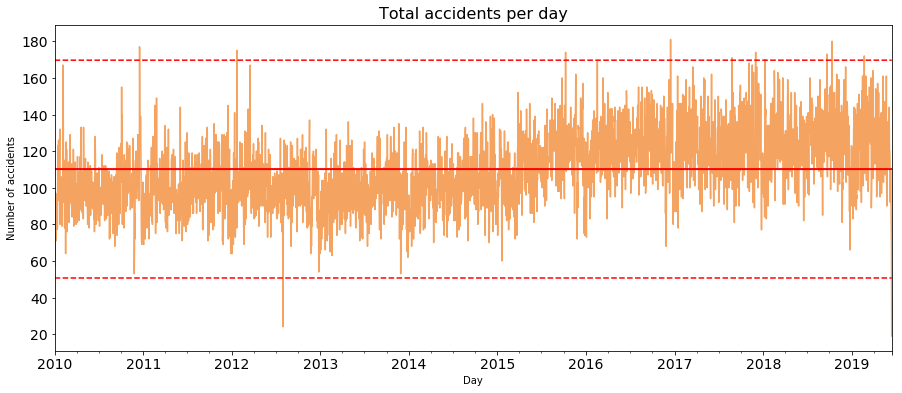

In [47]:
UCL = accidents_per_day['mean'] + 3 * accidents_per_day['std']
LCL = accidents_per_day['mean'] - 3 * accidents_per_day['std']
plt.figure(figsize=(15,6))
df.resample('D').size().plot(label='Accidents per day', color='sandybrown')
UCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
accidents_per_day['mean'].plot(color='red', linewidth=2, label='Average')
plt.title('Total accidents per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of accidents')
plt.tick_params(labelsize=14)

In [49]:
import datetime
date_before = datetime.date(2019, 6, 1)
df = df[df.date < date_before]

/home/jwkang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


## Total accidents per month

Text(0.5,1,'Total accidents per month')

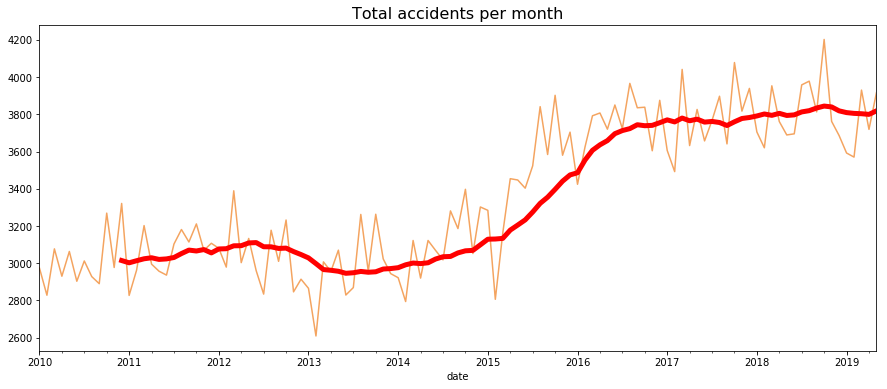

In [55]:
month_df = df.resample('M').size()
plt.figure(figsize=(15, 6))
month_df.plot(label='Total accidents per month', color='sandybrown')
month_df.rolling(window=12).mean().plot(color='red', linewidth=5, label='12-Months Average')
plt.title('Total accidents per month', fontsize=16)

In [56]:
print("Best Month {0}: {1}".format(month_df.idxmin(), month_df[month_df.idxmin()]))
print("Worst Month {0}: {1}".format(month_df.idxmax(), month_df[month_df.idxmax()]))

Best Month 2013-02-28 00:00:00: 2609
Worst Month 2018-10-31 00:00:00: 4202


## Accidents per weekday

In [57]:
weekdays = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
week_df = pd.DataFrame(df["day_of_week"].value_counts()).sort_index()

In [60]:
week_df["day"] = weekdays

In [63]:
week_df.columns = ["Accident counts", "Week day"]
week_df

,Accident counts,Week day
0,52570,Sun
1,54265,Mon
2,54738,Tue
3,55466,Wed
4,60867,Thu
5,53388,Fri
6,47630,Sat


Why Thursday??

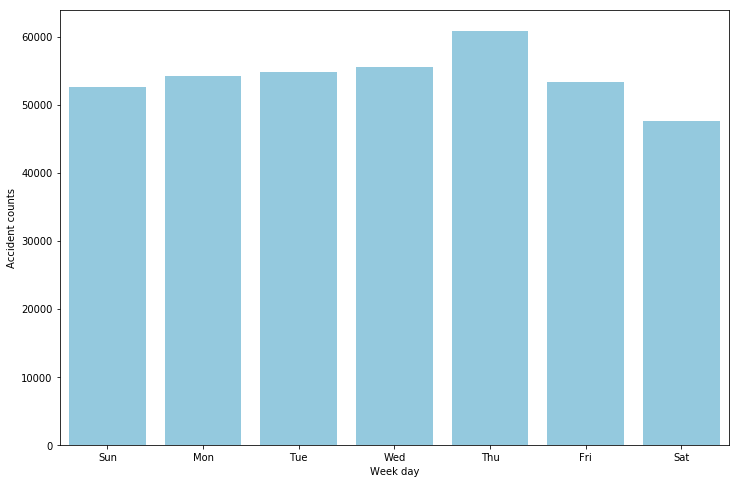

In [66]:
plt.figure(figsize=(12,8))
sns.barplot(x="Week day", y="Accident counts", color="skyblue", data=week_df)